[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1S12_i2nJN-9bvZNywbNsvFoSVr4kj4xh?usp=sharing)

In [ ]:
!pip install -q -U langchain  \
langchainhub \
langchain-community \
langchain-core \
langchain-experimental \
langchain-openai \
langchain-text-splitters \
langcodes \
langgraph \
langsmith \
libclang \
openai pandas matplotlib docarray grandalf semanticscholar arxiv xmltodict wikipedia

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.4/423.4 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.5/140.5 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.6/352.6 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.1/599.1 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!sudo apt-get install graphviz graphviz-dev
!pip -q install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
graphviz is already the newest version (2.42.2-6ubuntu0.1).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 30 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2.1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2.1 [2,038 kB]
Get:3 http://a

In [ ]:
!pip freeze | grep "lang\|openai\|chroma\|arxiv"

arxiv==2.1.3
google-ai-generativelanguage==0.6.15
google-cloud-language==2.17.1
langchain==0.3.22
langchain-community==0.3.20
langchain-core==0.3.50
langchain-experimental==0.3.4
langchain-openai==0.3.12
langchain-text-splitters==0.3.7
langchainhub==0.1.21
langcodes==3.5.0
langgraph==0.3.24
langgraph-checkpoint==2.0.24
langgraph-prebuilt==0.1.7
langgraph-sdk==0.1.61
langsmith==0.3.23
language_data==1.3.0
libclang==18.1.1
openai==1.70.0


In [ ]:
from google.colab import userdata
import os
# Set OpenAI API key from Google Colab's user environment or default
def set_api_keys(default_openai_key: str = "YOUR_API_KEY", default_tavily_key: str = "YOUR_API_KEY") -> None:
    """Set the OpenAI API key from Google Colab's user environment or use a default value."""

    os.environ["OPENAI_API_KEY"] = userdata.get("LC4LS_OPENAI_API_KEY") or default_openai_key

set_api_keys()
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]="lc4ls-ch5-langgraph-agents"
os.environ["LANGCHAIN_API_KEY"] = userdata.get("LANGCHAIN_API_KEY")

In [ ]:
from pydantic import BaseModel, Field
from langchain_core.tools import BaseTool, StructuredTool, tool, Tool
from typing import Optional, Type

from langchain.callbacks.manager import (
    AsyncCallbackManagerForToolRun,
    CallbackManagerForToolRun,
)


In [ ]:
class NumericInput2(BaseModel):
    a: float = Field(description="first number")
    b: float = Field(description="second number")

@tool("sum_2_numbers", args_schema=NumericInput2)
def sum2(a, b):
    """Sum two numbers."""
    return a + b

@tool("substract_2_numbers", args_schema=NumericInput2)
def substract2(a, b):
    """Subtract two numbers."""
    return a - b

@tool("multiply_2_numbers", args_schema=NumericInput2)
def multiply2(a, b):
    """Multiply two numbers."""
    return a * b

@tool("divide_2_numbers", args_schema=NumericInput2)
def divide2(a, b):
    """Divide two numbers."""
    return a / b

In [ ]:
from langchain import hub
from langchain.agents import AgentExecutor, create_tool_calling_agent, load_tools, create_react_agent
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate

#llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)
tools = [sum2, substract2, multiply2, divide2]
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a calculator. Use PEMDAS. Make sure to use the tools",
        ),
        ("placeholder", "{chat_history}"),
        ("human", "{input}"),
        ("placeholder", "{agent_scratchpad}"),
    ]
)

calculator_agent = create_tool_calling_agent(llm, tools, prompt)
calculator_agent_executor = AgentExecutor(agent=calculator_agent, tools=tools, verbose=True, handle_parsing_errors=True)

In [ ]:
from langchain_core.output_parsers import StrOutputParser
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a professional editor and typo-catcher",
        ),
        ("placeholder", "{chat_history}"),
        ("human", "{input}"),
        ("placeholder", "{agent_scratchpad}"),
    ]
)

typo_chain = prompt | llm | StrOutputParser()

In [ ]:
import requests
def get_pubchem_data(subword):
  response = requests.get(
    'https://pubchem.ncbi.nlm.nih.gov/sdq/sdqagent.cgi?infmt=json&outfmt=json&query={%22select%22:%22*%22,%22collection%22:%22compound%22,%22order%22:[%22relevancescore,desc%22],%22start%22:1,%22limit%22:10,%22where%22:{%22ands%22:[{%22*%22:%22'+subword+'%22}]},%22width%22:1000000,%22listids%22:0}',
    cookies={},
    headers={},
  )
  return response

In [ ]:
word = "ethyl"
typo_llm_response = typo_chain.invoke(f"""
  Return a semicolon-separated list of 10 most possible typos for word {word}.
  The resposnse should contain only possible typos!
  Don't include initial word {word} and don't add duplicates"""
)
typo_list = [x.strip() for x in typo_llm_response.replace(".", "").split(";")]

In [ ]:
typo_list

['ehtyl',
 'etyl',
 'ethly',
 'eythl',
 'ehtil',
 'etyhl',
 'ethli',
 'eylth',
 'ehtyl',
 'ethly']

In [ ]:
for subword in typo_list:
  response = get_pubchem_data(subword)
  total_count = response.json()['SDQOutputSet'][0]['totalCount']
  print(subword, total_count)

ehtyl 53
etyl 23
ethly 2453
eythl 0
ehtil 0
etyhl 1
ethli 2453
eylth 0
ehtyl 53
ethly 2453


In [ ]:
#calculator_agent_executor.invoke({"input": "3 / 3 + 3 * 3"})

In [ ]:
#calculator_agent_executor.invoke({"input": "Take half of the previous answer and deduct 5"})

In [ ]:
from langchain_core.prompts import PromptTemplate, MessagesPlaceholder
from langchain_community.tools.pubmed.tool import PubmedQueryRun
from langchain_community.tools.semanticscholar.tool import SemanticScholarQueryRun
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
import requests

#int(results['search-results']['opensearch:totalResults'])

llm = ChatOpenAI(model="gpt-4o", temperature=0)
API_KEY = "7f59af901d2d86f78a1fd60c1bf9426a"

generate_scopus_url_template = """
    Generate a SCOPUS API query URL based on the user's request.

    Instructions:
    - Use Boolean operators (AND, OR, AND NOT) to combine keywords.
    - Use `&` for dates, sorting and formatting options
    - URL-encode the query string.
    - Use field restriction codes to search specific fields.
    - Use proximity operators (pre/n, w/n) for proximity searches.
    - Use wildcards (? for single character, * for multiple characters) for flexible searches.
    - Follow order of precedence rules: OR > AND > AND NOT.
    - Enclose exact phrases in braces {{}}.
    - Use double quotation marks "" for approximate phrases.

    Sorting:
        If user askes for most cited papers - use `sort=-citedby-count`
        If most recent or latest papers - use `sort=-coverDate`

    If the number of output or count isn't mentioned, set as count=10

    If author is mentioned - use the following filtering (for Ivan Reznikov):
        AUTHOR-NAME(Reznikov, I)

    If affilation is mentioned - use the following filtering (for Google):
        AFFIL(Google)

    If a data range is mentioned - use the following rules:
        before 2000: date=0-2020
        2000-2003: date=2000-2003
        in 2025: date=2025
        after 2000: date=2000-3000
    Always use `&` for dates!

    Categorical keywords and their explanations:
    - DOCTYPE: Document Type (e.g.,
        "ar": "Article",
        "bk": "Book",
        "cp": "Conference Paper",
        "re": "Review",
        "ed": "Editorial",
        "le": "Letter",
        "no": "Note",
        "pr": "Press Release",
        "sh": "Short Survey")

    If Subjarea can be extracted - extract it and use SUBJAREA: subjarea(ENVI)
    Else use TITLE-ABS-KEY: TITLE-ABS-KEY(renewable%20energy)

    - SUBJAREA: Subject Area (
        "AGRI": "Agricultural and Biological Sciences",
        "ARTS": "Arts and Humanities",
        "BIOC": "Biochemistry, Genetics and Molecular Biology",
        "BUSI": "Business, Management and Accounting",
        "CENG": "Chemical Engineering",
        "CHEM": "Chemistry",
        "COMP": "Computer Science",
        "DECI": "Decision Sciences",
        "DENT": "Dentistry",
        "EART": "Earth and Planetary Sciences",
        "ECON": "Economics, Econometrics and Finance",
        "ENER": "Energy",
        "ENGI": "Engineering",
        "ENVI": "Environmental Science",
        "HEAL": "Health Professions",
        "IMMU": "Immunology and Microbiology",
        "MATE": "Materials Science",
        "MATH": "Mathematics",
        "MEDI": "Medicine",
        "NEUR": "Neuroscience",
        "NURS": "Nursing",
        "PHAR": "Pharmacology, Toxicology and Pharmaceutics",
        "PHYS": "Physics and Astronomy",
        "PSYC": "Psychology",
        "SOCI": "Social Sciences",
        "VETE": "Veterinary",
        "MULT": "Multidisciplinary"
    )
    - AFFILCOUNTRY: Affiliation Country (e.g., USA, China, Japan)
    - LANGUAGE: Language of the document (e.g., English, French, German)
    - OPENACCESS: Open Access status (1 = Open Access, 0 = Subscription-based)

    Examples:
    User request: "list 10 most cited papers on quantum computing"
    URL query: https://api.elsevier.com/content/search/scopus?query=TITLE-ABS-KEY(quantum%20computing)&sort=-citedby-count&count=10&apiKey={{API_KEY}}&view=STANDARD&httpAccept=application%2Fjson

    User request: "find papers on climate change from 2020 to 2023 in Environmental Science"
    URL query: https://api.elsevier.com/content/search/scopus?query=TITLE-ABS-KEY(climate%20change)%20AND%20subjarea(ENVI)&date=2020-2023&sort=-coverDate&apiKey={{API_KEY}}&view=STANDARD&httpAccept=application%2Fjson

    User request: "find 5 most recent papers on langchain in Computer Science"
    URL query: https://api.elsevier.com/content/search/scopus?query=TITLE-ABS-KEY(langchain)%20AND%20subjarea(COMP)&sort=-coverDate&count=5&apiKey={{API_KEY}}&view=STANDARD&httpAccept=application%2Fjson

    User request: "find 20 most recent papers on gene editing by author Li Q."
    URL query: https://api.elsevier.com/content/search/scopus?query=AUTHOR-NAME(Li,Q)%20AND%20all(gene%20editing)&sort=-coverDate&count=20&apiKey={{API_KEY}}&view=STANDARD&httpAccept=application%2Fjson


    User request: {user_query}
    URL query:
"""

generate_scopus_url_template = generate_scopus_url_template.replace("{{API_KEY}}", API_KEY)
generate_scopus_url_prompt = PromptTemplate.from_template(generate_scopus_url_template)

chain = (
    {"user_query": RunnablePassthrough()}
    | generate_scopus_url_prompt
    | llm
    | StrOutputParser()
)

generate_scopus_query_tool = Tool(
    name="generate_scopus_url",
    func=chain.invoke,
    description="A tool to generate a scopus url to retrieve scientific data"
)

@tool('request_url')
def request_url(url):
    "Tool for querying url"
    headers = {
        'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
        'accept-language': 'en-US,en;q=0.9,ru;q=0.8',
        'cache-control': 'max-age=0',
        # 'cookie': 'AMCVS_4D6368F454EC41940A4C98A6%40AdobeOrg=1; __cf_bm=vyLwhM.5yYUJUs8.uPGsa8PDR4AuQguVM2id9mVp.ks-1716273084-1.0.1.1-dffFtQVqLTeuRYW_lSnIVfEzbgIUDOehw3nmnzJt0ZbsHND3.1fvKWtwMF3pzMwp.Y7BenR.ZdplnC7eSi4bTw; test=cookie; AMCV_4D6368F454EC41940A4C98A6%40AdobeOrg=-408604571%7CMCIDTS%7C19864%7CMCMID%7C32223060440167140023422064896007367729%7CMCAID%7CNONE%7CMCOPTOUT-1716280359s%7CNONE%7CvVersion%7C4.6.0',
        'priority': 'u=0, i',
        #'referer': 'https://colab.research.google.com/',
        'sec-ch-ua': '"Chromium";v="124", "Google Chrome";v="124", "Not-A.Brand";v="99"',
        'sec-ch-ua-mobile': '?0',
        'sec-ch-ua-platform': '"Linux"',
        'sec-fetch-dest': 'document',
        'sec-fetch-mode': 'navigate',
        'sec-fetch-site': 'cross-site',
        'sec-fetch-user': '?1',
        'upgrade-insecure-requests': '1',
        'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36',
    }

    response = requests.get(
        url,
        headers=headers,
    )

    if response.status_code == 200:
        return response.json()['search-results']['entry']
    else:
        print(response.status_code, response.text)
        return None

In [ ]:
'''
    User request: "list recent papers by author John Doe in chemistry"
    URL query: https://api.elsevier.com/content/search/scopus?query=authname(John%20Doe)%20AND%20subjarea(CHEM)&sort=-coverDate&apiKey={{API_KEY}}&view=STANDARD&httpAccept=application%2Fjson

    User request: "list papers on renewable energy published in 2021 with wind and solar in abstract"
    URL query: https://api.elsevier.com/content/search/scopus?query=TITLE-ABS-KEY(renewable%20energy)%20AND%20abs(wind%20solar)&date=2021&subj=ENER&sort=-coverDate&apiKey={{API_KEY}}&view=STANDARD&httpAccept=application%2Fjson

    User request: "list papers on nanotechnology from stanford"
    URL query: https://api.elsevier.com/content/search/scopus?query=TITLE-ABS-KEY(nanotechnology)%20AND%20AFFIL(stanford)&sort=-coverDate&apiKey={{API_KEY}}&view=STANDARD&httpAccept=application%2Fjson

    User request: "find papers regarding openai published in 2020"
    URL query: https://api.elsevier.com/content/search/scopus?query=TITLE-ABS-KEY(openai)&date=2020&apiKey={{API_KEY}}&view=STANDARD&httpAccept=application%2Fjson

    User request: "find all papers by openai"
    URL query: https://api.elsevier.com/content/search/scopus?query=(openai)&sort=-coverDate&apiKey={{API_KEY}}&view=STANDARD&httpAccept=application%2Fjson

    User request: "find recent papers that include aspirin and water"
    URL query: https://api.elsevier.com/content/search/scopus?query=CHEM(aspirin&20water)&sort=-coverDate&apiKey={{API_KEY}}&view=STANDARD&httpAccept=application%2Fjson

    User request: "find 20 latest books on renewable energy"
    URL query: https://api.elsevier.com/content/search/scopus?query=TITLE-ABS-KEY(renewable%20energy)%20AND%20doctype(bk)&sort=-coverDate&count=20&apiKey={{API_KEY}}&view=STANDARD&httpAccept=application%2Fjson

    User request: "return data regarding 10.1007/s00202-004-0261-3 article"
    URL query: https://api.elsevier.com/content/search/scopus?query=DOI(10.1007/s00202-004-0261-3)&apiKey={{API_KEY}}&view=STANDARD&httpAccept=application%2Fjson

    User request: "return data regarding 9780123456789 isbn"
    URL query: https://api.elsevier.com/content/search/scopus?query=ISBN(9780123456789)&apiKey={{API_KEY}}&view=STANDARD&httpAccept=application%2Fjson

    User request: "list articles with chatgpt keyword in french"
    URL query: https://api.elsevier.com/content/search/scopus?query=key(chatgpt)%20AND%20Language(french)&apiKey={{API_KEY}}&view=STANDARD&httpAccept=application%2Fjson

    User request: "find 20 latest open access articles in large language models"
    URL query: https://api.elsevier.com/content/search/scopus?query=TITLE-ABS-KEY(large%20language%20models)%20AND%20openaccess(1)&sort=-coverDate&count=20&apiKey={{API_KEY}}&view=STANDARD&httpAccept=application%2Fjson

    User request: "find papers that cite Attention Is All You Need"
    URL query: https://api.elsevier.com/content/search/scopus?query=ref(Attention%20Is%20All%20You%20Need)&sort=-coverDate&apiKey={{API_KEY}}&view=STANDARD&httpAccept=application%2Fjson

    User request: "return data about GPT-4 Technical Report paper"
    URL query: https://api.elsevier.com/content/search/scopus?query=title(GPT-4%20Technical%20Report)&apiKey={{API_KEY}}&view=STANDARD&httpAccept=application%2Fjson

    User request: "find articles in artificial intelligence in medicine before 2000"
    URL query: https://api.elsevier.com/content/search/scopus?query=TITLE-ABS-KEY(artificial%20intelligence)%20AND%20subjarea(MEDI)&date(0-2000)&sort=-coverDate&count=20&apiKey={{API_KEY}}&view=STANDARD&httpAccept=application%2Fjson

    User request: "find papers on cancer research from China in Medicine"
    URL query: https://api.elsevier.com/content/search/scopus?query=TITLE-ABS-KEY(cancer%20research)%20AND%20AFFILCOUNTRY(China)&subj=MEDI&sort=-coverDate&apiKey={{API_KEY}}&view=STANDARD&httpAccept=application%2Fjson

'''

'\n    User request: "list recent papers by author John Doe in chemistry"\n    URL query: https://api.elsevier.com/content/search/scopus?query=authname(John%20Doe)%20AND%20subjarea(CHEM)&sort=-coverDate&apiKey={{API_KEY}}&view=STANDARD&httpAccept=application%2Fjson\n\n    User request: "list papers on renewable energy published in 2021 with wind and solar in abstract"\n    URL query: https://api.elsevier.com/content/search/scopus?query=TITLE-ABS-KEY(renewable%20energy)%20AND%20abs(wind%20solar)&date=2021&subj=ENER&sort=-coverDate&apiKey={{API_KEY}}&view=STANDARD&httpAccept=application%2Fjson\n\n    User request: "list papers on nanotechnology from stanford"\n    URL query: https://api.elsevier.com/content/search/scopus?query=TITLE-ABS-KEY(nanotechnology)%20AND%20AFFIL(stanford)&sort=-coverDate&apiKey={{API_KEY}}&view=STANDARD&httpAccept=application%2Fjson\n\n    User request: "find papers regarding openai published in 2020"\n    URL query: https://api.elsevier.com/content/search/scopus

In [ ]:
agent_prompt = hub.pull("hwchase17/react")

In [ ]:
agent_prompt.template = """
  You are a scientific search assistant. You have access to scopus and arxiv.
  To query Scopus, first generate a query using generate_scopus_url and execute it using query_url tool
  If arxiv or scopus is mentioned - query them. Else, query both.
  Your final answer to the original input question should be of the following format:
  ```
  Final Answer: the final answer to the original input question
  Arxiv results:
  <arxiv results>
  Scopus results:
  <scopus results>
  ```
""" + agent_prompt.template

In [ ]:
print(agent_prompt.template)


  You are a scientific search assistant. You have access to scopus and arxiv.
  To query Scopus, first generate a query using generate_scopus_url and execute it using query_url tool
  If arxiv or scopus is mentioned - query them. Else, query both.
  Your final answer to the original input question should be of the following format:
  ```
  Final Answer: the final answer to the original input question
  Arxiv results:
  <arxiv results>
  Scopus results:
  <scopus results>
  ```
Answer the following questions as best you can. You have access to the following tools:

{tools}

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input q

In [ ]:
tools = load_tools(
    ["arxiv"],
) + [generate_scopus_query_tool, request_url]

sci_search_agent = create_react_agent(llm, tools, agent_prompt)
agent_executor = AgentExecutor(agent=sci_search_agent, tools=tools, verbose=True, handle_parsing_errors=True)

In [ ]:
'''result = agent_executor.invoke(
    {
        "input": "List 5 papers dedicated to langchain published in the end of 2024",
    }
)'''

'result = agent_executor.invoke(\n    {\n        "input": "List 5 papers dedicated to langchain published in the end of 2024",\n    }\n)'

More tools

In [ ]:
agent_prompt = hub.pull("hwchase17/react")

In [ ]:
agent_prompt_instructions = """
  You are a scientific search assistant. You have access to scopus, semanticscholar, pubmed and arxiv.
  To query Scopus, first generate a query using generate_scopus_url and execute it using query_url tool
  If arxiv, pubmed, semanticscholar or scopus is specifically mentioned - query them.
  If a general question is asked - use all 4 tools: pubmed, semanticscholar, arxiv and scopus and aggregate the final results
  Provide final result in the following format:
  Arxiv results:
  <arxiv results>
  Semantic Scholar results:
  <semanticscholar results>
  Pubmed results:
  <pubmed results>
  Scopus results:
  <scopus results>
"""
prompt = agent_prompt.partial(instructions=agent_prompt_instructions)

In [ ]:
#llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)
tools = load_tools(
    ["arxiv"],
) + [PubmedQueryRun(), SemanticScholarQueryRun(), generate_scopus_query_tool, request_url]

sci_search_agent = create_react_agent(llm, tools, agent_prompt)
agent_executor = AgentExecutor(agent=sci_search_agent, tools=tools, verbose=True, handle_parsing_errors=True)

In [ ]:
'''result = agent_executor.invoke(
    {
        "input": "What are the 5 latest langchain papers?",
    }
)'''

'result = agent_executor.invoke(\n    {\n        "input": "What are the 5 latest langchain papers?",\n    }\n)'

In [ ]:
#print(result['output'])

Arxiv comparison

In [ ]:
import arxiv
from langchain_community.utilities.arxiv import ArxivAPIWrapper

query = 'langchain AND submittedDate:[20240101000000 TO 20241231235959]'

# langchain wrapper for arxiv
arxiv_tool = ArxivAPIWrapper(
 top_k_results = 3,
 #...
)
results = arxiv_tool.run(query)

print("langchain wrapper for arXiv: ArxivAPIWrapper")
print("======================")
print(results)
print("----------------------\n")

client = arxiv.Client()
search = arxiv.Search(
  query,
  max_results=3,
  sort_by=arxiv.SortCriterion.SubmittedDate,
  sort_order=arxiv.SortOrder.Descending
)
results = list(client.results(search))

print('python wrapper for arXiv: arxiv')
print("======================")
for result in results:
  print(f"Title: {result.title}")
  print(f"Date: {result.published}")

langchain wrapper for arXiv: ArxivAPIWrapper
Published: 2024-06-26
Title: Poisoned LangChain: Jailbreak LLMs by LangChain
Authors: Ziqiu Wang, Jun Liu, Shengkai Zhang, Yang Yang
Summary: With the development of natural language processing (NLP), large language
models (LLMs) are becoming increasingly popular. LLMs are integrating more into
everyday life, raising public concerns about their security vulnerabilities.
Consequently, the security of large language models is becoming critically
important. Currently, the techniques for attacking and defending against LLMs
are continuously evolving. One significant method type of attack is the
jailbreak attack, which designed to evade model safety mechanisms and induce
the generation of inappropriate content. Existing jailbreak attacks primarily
rely on crafting inducement prompts for direct jailbreaks, which are less
effective against large models with robust filtering and high comprehension
abilities. Given the increasing demand for real-time

In [ ]:
from langchain_community.utilities.arxiv import ArxivAPIWrapper
import arxiv

query = "langchain"

# python arxiv API client.
client = arxiv.Client()
search = arxiv.Search(
  query,
  max_results = 3,
  sort_by = arxiv.SortCriterion.SubmittedDate
)

print("")
print("original arxiv package")
print("="*20)
results = client.results(search)
for r in client.results(search):
    print(r.published, r.title)


original arxiv package
2025-03-17 17:34:04+00:00 Toward Generative 6G Simulation: An Experimental Multi-Agent LLM and ns-3 Integration
2025-03-11 09:27:56+00:00 DeepRAG: Building a Custom Hindi Embedding Model for Retrieval Augmented Generation from Scratch
2025-03-06 14:29:52+00:00 ToolFuzz -- Automated Agent Tool Testing


In [ ]:
'''from bs4 import BeautifulSoup
import requests
from urllib import parse

def get_scopus_abstract_html_page(url):
    cookies = {
        'scopus.machineID': '382BAF44BDAF460A4A985738032325C7.i-04526ccf913e7d600',
        'Scopus-usage-key': 'enable-logging',
        'AT_CONTENT_COOKIE': '"SERP_NEW_CTO:1,FEATURE_NEW_CITATION_OVERVIEW_IN_OLD_SERP:1,KDP_SOURCE_ENABLED:0,AUTH_NEW_CTO:1,FEATURE_NEW_CTO_AUTHOR_SEARCH:1,AUTH_NEW_CTO_CHART:1,KDP_FACADE_AFFILIATION_ENABLED:1,KDP_FACADE_ABSTRACT_ENABLED:1,FEATURE_SERVICE_FOR_METRICS:1,KDP_FACADE_PATENT_ENABLED:1,FEATURE_NEW_CTO_SOURCES:1,KDP_FACADE_AUTHOR_ENABLED:1,"',
        'at_check': 'true',
        'AMCVS_4D6368F454EC41940A4C98A6%40AdobeOrg': '1',
        'scopus_key': '_wVEP9AGpLyvc8wgG_nd7DZd',
        'SCSessionID': '188C9BFBD6862D31BAC86790C1474743.i-048e508e8ce3807e1',
        'scopusSessionUUID': '102cd35b-3a9a-4729-9',
        'AWSELB': 'CB9317D502BF07938DE10C841E762B7A33C19AADB10BDA3E6AA63100ED4B88F097CBDDA37834931E3ABFB65CE09170B32D3E55B62F10BA32070D9964CEACBAE7C5777723B767E88D8443D2704752AD04EBB4A851A0',
        '_cfuvid': 'b3P_tlUgRAUAXQGplwJ4hjRz3a3ZFYrWsx5JqGDf35g-1716372154032-0.0.1.1-604800000',
        'SCOPUS_JWT': 'eyJraWQiOiJjYTUwODRlNi03M2Y5LTQ0NTUtOWI3Zi1kMjk1M2VkMmRiYmMiLCJhbGciOiJSUzI1NiJ9.eyJzdWIiOiIxNjg3NTAzMyIsImRlcGFydG1lbnRJZCI6IjI4OTgzOSIsImlzcyI6IlNjb3B1cyIsImluc3RfYWNjdF9pZCI6IjI3ODY0MSIsImlzRXh0ZXJuYWxTdWJzY3JpYmVkRW50aXRsZW1lbnRzIjpmYWxzZSwicGF0aF9jaG9pY2UiOmZhbHNlLCJpbmR2X2lkZW50aXR5IjoiUkVHIiwiZXhwIjoxNzE2MzczMDU2LCJpYXQiOjE3MTYzNzIxNTcsImVtYWlsIjoiaXZhbnJlem5pa292QGdtYWlsLmNvbSIsImFuYWx5dGljc19pbmZvIjp7ImFjY2Vzc1R5cGUiOiJhZTpSRUc6VV9QOkdVRVNUOiIsInVzZXJJZCI6ImFlOjE2ODc1MDMzIiwiYWNjb3VudElkIjoiMjc4NjQxIiwiYWNjb3VudE5hbWUiOiJTY29wdXMgUHJldmlldyJ9LCJkZXBhcnRtZW50TmFtZSI6IlNjb3B1cyBQcmV2aWV3IiwiaW5zdF9hY2N0X25hbWUiOiJTY29wdXMgUHJldmlldyIsInN1YnNjcmliZXIiOmZhbHNlLCJ3ZWJVc2VySWQiOiIxNjg3NTAzMyIsImluc3RfYXNzb2NfbWV0aG9kIjoiIiwiZ2l2ZW5fbmFtZSI6Ikl2YW4iLCJhY2NvdW50TnVtYmVyIjoiQzAwMDI3ODY0MSIsInBhY2thZ2VJZHMiOltdLCJhdWQiOiJTY29wdXMiLCJuYmYiOjE3MTYzNzIxNTcsImZlbmNlcyI6WzQ4NTM4MF0sImluZHZfaWRlbnRpdHlfbWV0aG9kIjoiVV9QIiwiaW5zdF9hc3NvYyI6IkdVRVNUIiwibmFtZSI6Ikl2YW4gUmV6bmlrb3YiLCJ1c2FnZVBhdGhJbmZvIjoiKDE2ODc1MDMzLFV8Mjg5ODM5LER8Mjc4NjQxLEF8NzIyMTgsUHwxLFBMKShTQ09QVVMsQ09OfGRiM2I0MTI0M2ZmYzU5NGU5Mjg4NTA2NmZiZTk0MzJlYTVkNWd4cnFiLFNTT3xSRUdfR1VFU1QsQUNDRVNTX1RZUEUpIiwicHJpbWFyeUFkbWluUm9sZXMiOltdLCJhdXRoX3Rva2VuIjoiZGIzYjQxMjQzZmZjNTk0ZTkyODg1MDY2ZmJlOTQzMmVhNWQ1Z3hycWIiLCJmYW1pbHlfbmFtZSI6IlJlem5pa292In0.W3jN_W3RQGjEtUnveVRvjCaVsBOsKliB0bUhl5w0HiMjqK-A1Yd_xbpNp2z4m5BK0bUOyJl_xpYvZIbXcqUhFNeVaNJiNX_kKq9XfEzfMZtOYqdTXQde_3IdwDZCcfShY0q3vmCS5eTfArdyJLCx2Ogb8HgKJkzjPHh5FbbeIJ6XGMUPrq8n1BG4hYgdPzAAxObz3s7kgVgSQtYZKUCPp3UZBkloNFcyHR3kcEkFftUPW8Ug8sVZg3FvjexKsZ3immQ441ln2e9U8j4mP2M2U_YibZ0XCpOwj6oj-HyT4ItXANCF1PuW7sc4iuVhv5NHwsqCdzJmcYkk5E7aq_7GfQ',
        '__cfruid': '0d75c0be8f31c48a925fd1c07927607cb5b4698f-1716372158',
        'test': 'cookie',
        'AMCV_4D6368F454EC41940A4C98A6%40AdobeOrg': '-2121179033%7CMCIDTS%7C19866%7CMCMID%7C06989987076294826639222526363360587893%7CMCAID%7CNONE%7CMCOPTOUT-1716379368s%7CNONE%7CvVersion%7C5.3.0',
        'mbox': 'PC#8db1f849bc1a43b4a2fa676997a92222.37_0#1779616969|session#1a372556dff64359a03cba58d8cdba3a#1716374029',
        'aa-cookie-test': 'aa-cookie-test',
    }

    headers = {
        'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
        'accept-language': 'en-US,en;q=0.9,ru;q=0.8',
        # 'cookie': 'scopus.machineID=382BAF44BDAF460A4A985738032325C7.i-04526ccf913e7d600; Scopus-usage-key=enable-logging; AT_CONTENT_COOKIE="SERP_NEW_CTO:1,FEATURE_NEW_CITATION_OVERVIEW_IN_OLD_SERP:1,KDP_SOURCE_ENABLED:0,AUTH_NEW_CTO:1,FEATURE_NEW_CTO_AUTHOR_SEARCH:1,AUTH_NEW_CTO_CHART:1,KDP_FACADE_AFFILIATION_ENABLED:1,KDP_FACADE_ABSTRACT_ENABLED:1,FEATURE_SERVICE_FOR_METRICS:1,KDP_FACADE_PATENT_ENABLED:1,FEATURE_NEW_CTO_SOURCES:1,KDP_FACADE_AUTHOR_ENABLED:1,"; at_check=true; AMCVS_4D6368F454EC41940A4C98A6%40AdobeOrg=1; _cfuvid=jQVrHI6vb23ZE4P4I6rK4qo8WY.fAaJzNiZ3WZH1pvE-1716243250820-0.0.1.1-604800000; __cfruid=7e0d538356e6aca86c9347c8548e89cc2693eca0-1716243255; SCSessionID=9C88A461D432746D3E81DA146328F9FE.i-02a6a44a836d6f869; scopusSessionUUID=38247368-c64d-469a-a; AWSELB=CB9317D502BF07938DE10C841E762B7A33C19AADB1F40D1D388AEB7271199CC4F4FFDF5F187F1C6FDD692C48C68072F1A4F7E0C54CA31AAC5A6BDE3E4B4DACF34F3854CEEBB39286117B5921CEDEB6D07D4A6757BE; SCOPUS_JWT=eyJraWQiOiJjYTUwODRlNi03M2Y5LTQ0NTUtOWI3Zi1kMjk1M2VkMmRiYmMiLCJhbGciOiJSUzI1NiJ9.eyJzdWIiOiIxNjg3NTAzMyIsImRlcGFydG1lbnRJZCI6IjI4OTgzOSIsImlzcyI6IlNjb3B1cyIsImluc3RfYWNjdF9pZCI6IjI3ODY0MSIsImlzRXh0ZXJuYWxTdWJzY3JpYmVkRW50aXRsZW1lbnRzIjpmYWxzZSwicGF0aF9jaG9pY2UiOmZhbHNlLCJpbmR2X2lkZW50aXR5IjoiUkVHIiwiZXhwIjoxNzE2Mjc1MDAxLCJpYXQiOjE3MTYyNzQxMDIsImVtYWlsIjoiaXZhbnJlem5pa292QGdtYWlsLmNvbSIsImFuYWx5dGljc19pbmZvIjp7InVzZXJJZCI6ImFlOjE2ODc1MDMzIiwiYWNjZXNzVHlwZSI6ImFlOlJFRzpVX1A6R1VFU1Q6IiwiYWNjb3VudE5hbWUiOiJTY29wdXMgUHJldmlldyIsImFjY291bnRJZCI6IjI3ODY0MSJ9LCJkZXBhcnRtZW50TmFtZSI6IlNjb3B1cyBQcmV2aWV3IiwiaW5zdF9hY2N0X25hbWUiOiJTY29wdXMgUHJldmlldyIsInN1YnNjcmliZXIiOmZhbHNlLCJ3ZWJVc2VySWQiOiIxNjg3NTAzMyIsImluc3RfYXNzb2NfbWV0aG9kIjoiIiwiZ2l2ZW5fbmFtZSI6Ikl2YW4iLCJhY2NvdW50TnVtYmVyIjoiQzAwMDI3ODY0MSIsInBhY2thZ2VJZHMiOltdLCJhdWQiOiJTY29wdXMiLCJuYmYiOjE3MTYyNzQxMDIsImZlbmNlcyI6WzQ4NTM4MF0sImluZHZfaWRlbnRpdHlfbWV0aG9kIjoiVV9QIiwiaW5zdF9hc3NvYyI6IkdVRVNUIiwibmFtZSI6Ikl2YW4gUmV6bmlrb3YiLCJ1c2FnZVBhdGhJbmZvIjoiKDE2ODc1MDMzLFV8Mjg5ODM5LER8Mjc4NjQxLEF8NzIyMTgsUHwxLFBMKShTQ09QVVMsQ09OfGRiM2I0MTI0M2ZmYzU5NGU5Mjg4NTA2NmZiZTk0MzJlYTVkNWd4cnFiLFNTT3xSRUdfR1VFU1QsQUNDRVNTX1RZUEUpIiwicHJpbWFyeUFkbWluUm9sZXMiOltdLCJhdXRoX3Rva2VuIjoiZGIzYjQxMjQzZmZjNTk0ZTkyODg1MDY2ZmJlOTQzMmVhNWQ1Z3hycWIiLCJmYW1pbHlfbmFtZSI6IlJlem5pa292In0.ChIbZJORHG4Y5NSPN8pxZ2T_3ASUeXkpnbaVYFbt3eC_QaadE2doSzSNV2GW_1meyUeLX0m7QT6zB_TcGGyczQJS7tjfCIeznqBmwb8dzY5z8pM6Emm-USBQpKmacURu7nT-cOb4xtpJC94aRFDDoRvULxh44B13emMIYvxjbgr4r6vx7ImNdXlq8yyGMBs_Re1_I_2hLnPe2duT9AQyY00SyBPyqFnfBZFIp7CrzP0R0TGx-Rp_OlZnvq4xrj22qw6GdiC2slrM0jQhJeAZXfcuMuoOJxz37AL0LCVMOCfh2gMS0mHtY_VQ9lYSTMmkJmayKmSD4HZ1RhtmdfSwrw; scopus_key=_wVEP9AGpLyvc8wgG_nd7DZd; __cf_bm=ePIfZvsTlkY9MRJg2SwixXPzP9.9IwM2GiiacYVderA-1716278210-1.0.1.1-MKafPJM_ZOJbhlGUmKSRsu9xatrF2fTB.JU67MHg2cf0KrVd4mdKCDVSaEo9dzWEWe.EYCM29fKZqUmGBHGmog; test=cookie; AMCV_4D6368F454EC41940A4C98A6%40AdobeOrg=-2121179033%7CMCIDTS%7C19864%7CMCMID%7C06989987076294826639222526363360587893%7CMCAID%7CNONE%7CMCOPTOUT-1716285903s%7CNONE%7CvVersion%7C5.3.0; mbox=PC#8db1f849bc1a43b4a2fa676997a92222.37_0#1779523504|session#ddfe78d928214fca86445c7070bafbc0#1716280564; aa-cookie-test=aa-cookie-test',
        'priority': 'u=0, i',
        'sec-ch-ua': '"Chromium";v="124", "Google Chrome";v="124", "Not-A.Brand";v="99"',
        'sec-ch-ua-mobile': '?0',
        'sec-ch-ua-platform': '"Linux"',
        'sec-fetch-dest': 'document',
        'sec-fetch-mode': 'navigate',
        'sec-fetch-site': 'none',
        'sec-fetch-user': '?1',
        'upgrade-insecure-requests': '1',
        'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36',
    }

    params = {k: v[0] for k, v in parse.parse_qs(parse.urlparse(url).query).items()}

    response = requests.get('https://www.scopus.com/inward/record.uri', params=params, cookies=cookies, headers=headers)
    if response.status_code == 200:
      return response.text
    else:
      print(response.status_code, response.text)
      return None

def extract_page_title(soup):
    try:
        return soup.find('sc-page-title')['pagetitle']
    except (AttributeError, TypeError):
        return None

def extract_article_title(soup):
    try:
        return soup.find('h2', class_='h3').get_text(strip=True)
    except AttributeError:
        return None

def extract_journal_info(soup):
    try:
        article_title_section = soup.find('section', id='articleTitleInfo')
        journal_info = article_title_section.find_all('span', class_='list-group-item')
        journal_title = journal_info[0].get_text(strip=True)
        journal_volume = journal_info[1].get_text(strip=True)
        return journal_title, journal_volume
    except (AttributeError, IndexError):
        return None, None

def extract_authors(soup):
    authors = []
    try:
        author_list_section = soup.find('section', id='authorlist')
        author_spans = author_list_section.find_all('span', class_='previewTxt')
        for span in author_spans:
            authors.append(span.get_text(strip=True))
    except AttributeError:
        pass
    return authors

def extract_affiliations(soup):
    affiliations = []
    try:
        affiliation_list_section = soup.find('section', id='affiliationlist')
        affiliation_lis = affiliation_list_section.find_all('li')
        for li in affiliation_lis:
            affiliations.append(li.get_text(strip=True))
    except AttributeError:
        pass
    return affiliations

def extract_abstract(soup):
    try:
        abstract_section = soup.find('section', id='abstractSection')
        return abstract_section.find('p').get_text(strip=True)
    except AttributeError:
        return None

def extract_author_keywords(soup):
    author_keywords = []
    try:
        author_keywords_section = soup.find('section', id='authorKeywords')
        author_keyword_spans = author_keywords_section.find_all('span', class_='badges')
        for span in author_keyword_spans:
            author_keywords.append(span.get_text(strip=True))
    except AttributeError:
        pass
    return author_keywords

def extract_indexed_keywords(soup):
    indexed_keywords = {}
    try:
        indexed_keywords_section = soup.find('section', id='indexedKeywords')
        keyword_rows = indexed_keywords_section.find_all('tr')
        for row in keyword_rows:
            th = row.find('th')
            td = row.find('td')
            if th and td:
                category = th.get_text(strip=True)
                keywords = [span.get_text(strip=True) for span in td.find_all('span', class_='badges')]
                indexed_keywords[category] = keywords
    except AttributeError:
        pass
    return indexed_keywords

def extract_funding_details(soup):
    funding_details = []
    try:
        funding_section = soup.find('section', id='fundingDetails')
        funding_table = funding_section.find('table', class_='table')
        if funding_table:
            funding_rows = funding_table.find('tbody').find_all('tr')
            for row in funding_rows:
                funding_sponsor = row.find_all('td')[0].get_text(strip=True)
                funding_number = row.find_all('td')[1].get_text(strip=True)
                funding_acronym = row.find_all('td')[2].get_text(strip=True)
                funding_details.append({
                    'sponsor': funding_sponsor,
                    'number': funding_number,
                    'acronym': funding_acronym
                })
    except AttributeError:
        pass
    return funding_details

def extract_other_details(soup):
    other_details = {}
    try:
        reference_info_section = soup.find('section', id='referenceInfo')
        if reference_info_section:
            issn = reference_info_section.find('strong', string='ISSN: ').next_sibling.strip()
            doi = reference_info_section.find('span', id='recordDOI').get_text(strip=True)
            other_details['ISSN'] = issn
            other_details['DOI'] = doi
    except AttributeError:
        pass
    return other_details

def extract_data_from_html(url):
    html = get_scopus_abstract_html_page(url=url)
    soup = BeautifulSoup(html, 'html.parser')
    extracted_data = {
        "Page Title": extract_page_title(soup),
        "Article Title": extract_article_title(soup),
        "Journal Title": extract_journal_info(soup)[0],
        "Journal Volume": extract_journal_info(soup)[1],
        "Authors": extract_authors(soup),
        "Affiliations": extract_affiliations(soup),
        "Abstract": extract_abstract(soup),
        "Author Keywords": extract_author_keywords(soup),
        "Indexed Keywords": extract_indexed_keywords(soup),
        "Funding Details": extract_funding_details(soup),
        "Other Details": extract_other_details(soup)
    }
    return extracted_data

    extract_data_from_html('https://www.scopus.com/inward/record.uri?partnerID=HzOxMe3b&scp=85192748099&origin=inward')
    '''

'from bs4 import BeautifulSoup\nimport requests\nfrom urllib import parse\n\ndef get_scopus_abstract_html_page(url):\n    cookies = {\n        \'scopus.machineID\': \'382BAF44BDAF460A4A985738032325C7.i-04526ccf913e7d600\',\n        \'Scopus-usage-key\': \'enable-logging\',\n        \'AT_CONTENT_COOKIE\': \'"SERP_NEW_CTO:1,FEATURE_NEW_CITATION_OVERVIEW_IN_OLD_SERP:1,KDP_SOURCE_ENABLED:0,AUTH_NEW_CTO:1,FEATURE_NEW_CTO_AUTHOR_SEARCH:1,AUTH_NEW_CTO_CHART:1,KDP_FACADE_AFFILIATION_ENABLED:1,KDP_FACADE_ABSTRACT_ENABLED:1,FEATURE_SERVICE_FOR_METRICS:1,KDP_FACADE_PATENT_ENABLED:1,FEATURE_NEW_CTO_SOURCES:1,KDP_FACADE_AUTHOR_ENABLED:1,"\',\n        \'at_check\': \'true\',\n        \'AMCVS_4D6368F454EC41940A4C98A6%40AdobeOrg\': \'1\',\n        \'scopus_key\': \'_wVEP9AGpLyvc8wgG_nd7DZd\',\n        \'SCSessionID\': \'188C9BFBD6862D31BAC86790C1474743.i-048e508e8ce3807e1\',\n        \'scopusSessionUUID\': \'102cd35b-3a9a-4729-9\',\n        \'AWSELB\': \'CB9317D502BF07938DE10C841E762B7A33C19AADB10BDA3

In [ ]:
'''from typing import List, Optional

from langchain_core.pydantic_v1 import BaseModel, Field
from langchain_openai import ChatOpenAI


class Publication(BaseModel):
    """Information about a single publication entry."""
    _fa: Optional[bool] = Field(None, description="Flag attribute")
    link: List[] = Field([], description="List of links")
    prism_url: Optional[str] = Field(None, description="Prism URL")
    dc_identifier: Optional[str] = Field(None, description="DC identifier")
    eid: Optional[str] = Field(None, description="EID")
    dc_title: Optional[str] = Field(None, description="Title")
    dc_creator: Optional[str] = Field(None, description="Creator")
    prism_publicationName: Optional[str] = Field(None, description="Publication name")
    prism_issn: Optional[str] = Field(None, description="ISSN")
    prism_eIssn: Optional[str] = Field(None, description="EISSN")
    prism_volume: Optional[str] = Field(None, description="Volume")
    prism_issueIdentifier: Optional[str] = Field(None, description="Issue identifier")
    prism_pageRange: Optional[str] = Field(None, description="Page range")
    prism_coverDate: Optional[str] = Field(None, description="Cover date")
    prism_coverDisplayDate: Optional[str] = Field(None, description="Cover display date")
    prism_doi: Optional[str] = Field(None, description="DOI")
    citedby_count: Optional[int] = Field(None, description="Cited by count")
    affiliation: List[] = Field([], description="List of affiliations")
    pubmed_id: Optional[str] = Field(None, description="PubMed ID")
    prism_aggregationType: Optional[str] = Field(None, description="Aggregation type")
    subtype: Optional[str] = Field(None, description="Subtype")
    subtypeDescription: Optional[str] = Field(None, description="Subtype description")
    article_number: Optional[str] = Field(None, description="Article number")
    source_id: Optional[str] = Field(None, description="Source ID")
    openaccess: Optional[str] = Field(None, description="Open access")
    openaccessFlag: Optional[bool] = Field(None, description="Open access flag")
    freetoread: Optional[dict] = Field(None, description="Free to read information")
    freetoreadLabel: Optional[dict] = Field(None, description="Free to read label")

class SearchResults(BaseModel):
    """Information about the search results."""
    totalResults: Optional[int] = Field(None, alias="opensearch:totalResults", description="Total number of results")
    startIndex: Optional[int] = Field(None, alias="opensearch:startIndex", description="Start index")
    itemsPerPage: Optional[int] = Field(None, alias="opensearch:itemsPerPage", description="Number of items per page")
    query = Field(..., alias="opensearch:Query", description="Query information")'''

'from typing import List, Optional\n\nfrom langchain_core.pydantic_v1 import BaseModel, Field\nfrom langchain_openai import ChatOpenAI\n\n\nclass Publication(BaseModel):\n    """Information about a single publication entry."""\n    _fa: Optional[bool] = Field(None, description="Flag attribute")\n    link: List[] = Field([], description="List of links")\n    prism_url: Optional[str] = Field(None, description="Prism URL")\n    dc_identifier: Optional[str] = Field(None, description="DC identifier")\n    eid: Optional[str] = Field(None, description="EID")\n    dc_title: Optional[str] = Field(None, description="Title")\n    dc_creator: Optional[str] = Field(None, description="Creator")\n    prism_publicationName: Optional[str] = Field(None, description="Publication name")\n    prism_issn: Optional[str] = Field(None, description="ISSN")\n    prism_eIssn: Optional[str] = Field(None, description="EISSN")\n    prism_volume: Optional[str] = Field(None, description="Volume")\n    prism_issueIdent

In [ ]:
#llm = ChatOpenAI(model="gpt-3.5-turbo-1106", streaming=True)

In [ ]:
from typing import Annotated
from langchain_core.messages import BaseMessage
from typing_extensions import TypedDict

from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition

class State(TypedDict):
    messages: Annotated[list, add_messages]

tools = [PubmedQueryRun(), SemanticScholarQueryRun()]
llm = ChatOpenAI(model="gpt-4o-mini", streaming=True)
llm_with_tools = llm.bind_tools(tools)

In [ ]:
def run_agent(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

graph_builder = StateGraph(State)

graph_builder.add_node("agent", run_agent)

tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "agent",
    tools_condition,
)
graph_builder.add_edge("tools", "agent")
graph_builder.set_entry_point("agent")
memory = MemorySaver()
graph = graph_builder.compile(checkpointer=memory)

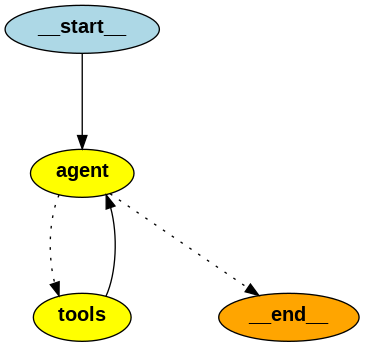

In [ ]:
from IPython.display import Image, display

display(Image(graph.get_graph(xray=True).draw_png()))

In [ ]:
user_input = """
        Do step-by-step. Call the tools multiple times if needed.
        Determine the precise genomic locations and the degree of change in DNA methylation
        patterns in Arabidopsis thaliana after severe drought stress.
        After finding the specified genomic locations and numerical methylation changes
        list specific genes that exhibit significant changes in expression.
        Using the specified genes list, quantify the resulting levels of
        abscisic acid (ABA) in the plant tissues.
        """

config = {"configurable": {"thread_id": "1"}}
# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [{"role": "user", "content": user_input}]},
    config,
    stream_mode="values",
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================


        Do step-by-step. Call the tools multiple times if needed.
        Determine the precise genomic locations and the degree of change in DNA methylation 
        patterns in Arabidopsis thaliana after severe drought stress.
        After finding the specified genomic locations and numerical methylation changes 
        list specific genes that exhibit significant changes in expression.
        Using the specified genes list, quantify the resulting levels of 
        abscisic acid (ABA) in the plant tissues.
        
================================== Ai Message ==================================
Tool Calls:
  pub_med (call_8ZbGIgKPfCNgrrO05HMNiXPy)
 Call ID: call_8ZbGIgKPfCNgrrO05HMNiXPy
  Args:
    query: DNA methylation patterns Arabidopsis thaliana drought stress genomic locations
================================= Tool Message =================================
Name: pub_med

Published: 2016-08-03

Slightly more advanced version

In [ ]:
from typing import TypedDict, Annotated, List, Union, Tuple
from langchain_core.agents import AgentAction, AgentFinish
from langchain_core.messages import BaseMessage
from langchain_core.tools import BaseTool
from langchain.agents import create_openai_functions_agent
from langgraph.prebuilt import ToolNode
from langgraph.graph import StateGraph, END
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper
import operator

wikipedia = WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper())

from langchain.agents import create_openai_functions_agent
llm = ChatOpenAI(model="gpt-4o-mini", streaming=True)
llm_with_tools = llm.bind_tools(tools)
tools =  [PubmedQueryRun(), SemanticScholarQueryRun()]
prompt = hub.pull("hwchase17/openai-functions-agent")

# Construct the OpenAI Functions agent
agent_runnable = create_openai_functions_agent(llm, tools, prompt)

class AgentState(TypedDict):
    input: str
    chat_history: list[BaseMessage]
    agent_outcome: Union[AgentAction, AgentFinish, None]
    intermediate_steps: Annotated[list[tuple[AgentAction, str]], operator.add]

In [ ]:
# Define the agent
def run_agent(data):
    agent_outcome = agent_runnable.invoke(data)
    return {"agent_outcome": agent_outcome}

# Define the action node - function to execute tools
tool_executor = ToolNode(tools)
def execute_tools(data):
    agent_action = data["agent_outcome"]
    output = tool_executor.invoke(agent_action)
    print("agent_action", agent_action)
    return {"intermediate_steps": [(agent_action, str(output))]}

def should_continue(data):
    # If the agent outcome is an AgentFinish, then we return end string
    if isinstance(data["agent_outcome"], AgentFinish):
        return "end"
    else:
        return "continue"

In [ ]:
# Define a new graph
workflow = StateGraph(AgentState)

# Define the nodes and set the entrypoint as `agent`
workflow.add_node("agent", run_agent)
workflow.add_node("action", execute_tools)
workflow.set_entry_point("agent")

# Add a conditional edge
workflow.add_conditional_edges(
    "agent",  # start node
    should_continue,  # function that will determine which node is called next
    # Mapping for next action
    {
        "continue": "action",  # if `continue`, then we call the tool node
        "end": END,  # if `end`, then we finish
    },
)

# Add a normal edge: after `action` is called, `agent` node is called next
workflow.add_edge("action", "agent")

# Compiling graph
memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

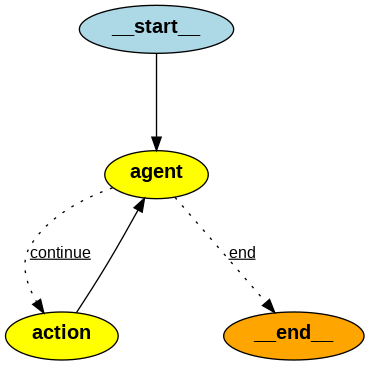

In [ ]:
from IPython.display import Image, display

display(Image(app.get_graph(xray=True).draw_png()))

In [ ]:
config = {"configurable": {"thread_id": "1"}}

In [ ]:
user_input = """
        Do step-by-step. Call the tools multiple times if needed.
        Determine the precise genomic locations and the degree of change in DNA methylation
        patterns in Arabidopsis thaliana after severe drought stress.
        After finding the specified genomic locations and numerical methylation changes
        list specific genes that exhibit significant changes in expression.
        Using the specified genes list, quantify the resulting levels of
        abscisic acid (ABA) in the plant tissues."
    """
'''
events = graph.stream(
    {"messages": [{"role": "user", "content": user_input}]},
    config,
    stream_mode="values",
)
for event in events:
    event["messages"][-1].pretty_print()
'''

'\nevents = graph.stream(\n    {"messages": [{"role": "user", "content": user_input}]},\n    config,\n    stream_mode="values",\n)\nfor event in events:\n    event["messages"][-1].pretty_print()\n'

In [ ]:
from typing import Annotated, Sequence, TypedDict
import functools
import operator

from langchain.output_parsers.openai_functions import JsonOutputFunctionsParser
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain.agents import AgentExecutor, create_openai_tools_agent
from langchain_experimental.utilities import PythonREPL
from langchain.tools import tool
from langgraph.graph import StateGraph, END
from pydantic.v1 import BaseModel
from langchain.chat_models import ChatOpenAI

# Define the AgentState class
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]
    next: str

# Initialize tools
repl = PythonREPL()

@tool
def python_repl(code: str):
    """Execute python code. Print values to see output."""
    try:
        result = repl.run(code)
        return f"Successfully executed:\n```python\n{code}\n```\nStdout: {result}"
    except BaseException as e:
        return f"Failed to execute. Error: {repr(e)}"

class WriteReportArgsSchema(BaseModel):
    filename: str
    html: str

def write_report(filename, html):
    with open(filename, 'w') as f:
        f.write(html)

write_report_tool = StructuredTool.from_function(
    name="write_report",
    description="Write HTML to disk as a report.",
    func=write_report,
    args_schema=WriteReportArgsSchema
)

# Initialize the LLM
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0, streaming=True)

# Helper function to create agents
def create_agent(tools, system_message):
    prompt = ChatPromptTemplate.from_messages([
        ("system", system_message),
        MessagesPlaceholder(variable_name="messages"),
        MessagesPlaceholder(variable_name="agent_scratchpad"),
    ])
    agent = create_openai_tools_agent(llm, tools, prompt)
    return AgentExecutor(agent=agent, tools=tools)

# Helper function to run agents
def run_agent(state, agent, name):
    result = agent.invoke(state)
    return {"messages": [HumanMessage(content=result["output"], name=name)]}

# Define team members and create agents
members = ["Researcher", "VizGenerator", "ReportGenerator"]

# Create specialized agents
research_agent = create_agent(
    tools=load_tools(["arxiv"]) + [SemanticScholarQueryRun()],
    system_message="Provide accurate data for chart generation."
)

chart_agent = create_agent(
    tools=[python_repl],
    system_message="Create visualizations and tables visible to the user."
)

report_agent = create_agent(
    tools=[write_report_tool],
    system_message="Create HTML reports based on research and visualizations."
)

# Create partial functions for each agent node
agent_nodes = {
    "Researcher": functools.partial(run_agent, agent=research_agent, name="Researcher"),
    "VizGenerator": functools.partial(run_agent, agent=chart_agent, name="VizGenerator"),
    "ReportGenerator": functools.partial(run_agent, agent=report_agent, name="ReportGenerator")
}

# Define supervisor routing function
supervisor_prompt = ChatPromptTemplate.from_messages([
    ("system", "You manage a conversation between these workers: {members}. "
              "Given the user request, respond with the worker to act next."),
    MessagesPlaceholder(variable_name="messages"),
    ("system", "Who should act next? Or should we FINISH? Select one of: {options}"),
]).partial(options=str(["FINISH"] + members), members=", ".join(members))

function_def = {
    "name": "route",
    "description": "Select the next role.",
    "parameters": {
        "title": "routeSchema",
        "type": "object",
        "properties": {
            "next": {
                "title": "Next",
                "anyOf": [{"enum": ["FINISH"] + members}],
            }
        },
        "required": ["next"],
    }
}

supervisor_chain = (
    supervisor_prompt
    | llm.bind_functions(functions=[function_def], function_call="route")
    | JsonOutputFunctionsParser()
)

# Build the workflow graph
workflow = StateGraph(AgentState)

# Add nodes
workflow.add_node("supervisor", supervisor_chain)
for member, node_func in agent_nodes.items():
    workflow.add_node(member, node_func)
    workflow.add_edge(member, "supervisor")

# Add conditional edges from supervisor to agents or END
conditional_map = {member: member for member in members}
conditional_map["FINISH"] = END
workflow.add_conditional_edges("supervisor", lambda state: state["next"], conditional_map)
workflow.set_entry_point("supervisor")

# Compile the workflow
graph = workflow.compile()

# Example usage
query = """List 10 LLMs with results on STEM and Humanities sections of MMLU.
           Create a report that includes the histogram of different models' scores and an overall table.
           Include the summary of the findings in the report"""

{'supervisor': {'next': 'Researcher'}}
----
{'Researcher': {'messages': [HumanMessage(content="### Report on LLMs Performance in STEM and Humanities Sections of MMLU\n\n#### Introduction\nThis report summarizes the performance of various large language models (LLMs) on the Massive Multitask Language Understanding (MMLU) benchmark, specifically focusing on their scores in the STEM and Humanities sections. The MMLU benchmark is designed to evaluate the reasoning and understanding capabilities of LLMs across a wide range of subjects.\n\n#### Models Evaluated\nThe following ten LLMs were evaluated based on their performance in the MMLU benchmark:\n\n1. **OpenAI's GPT-4**\n2. **Mistral-large**\n3. **Llama-70B**\n4. **Polyglot-Ko**\n5. **HyperCLOVA X**\n6. **Llama-3.1**\n7. **Qwen-2.5**\n8. **DeepSeek V3**\n9. **GPT-3.5**\n10. **EleutherAI's GPT-Neo**\n\n#### Performance Summary\nThe scores of the models in the STEM and Humanities sections of the MMLU benchmark are as follows:\n\n| Model    

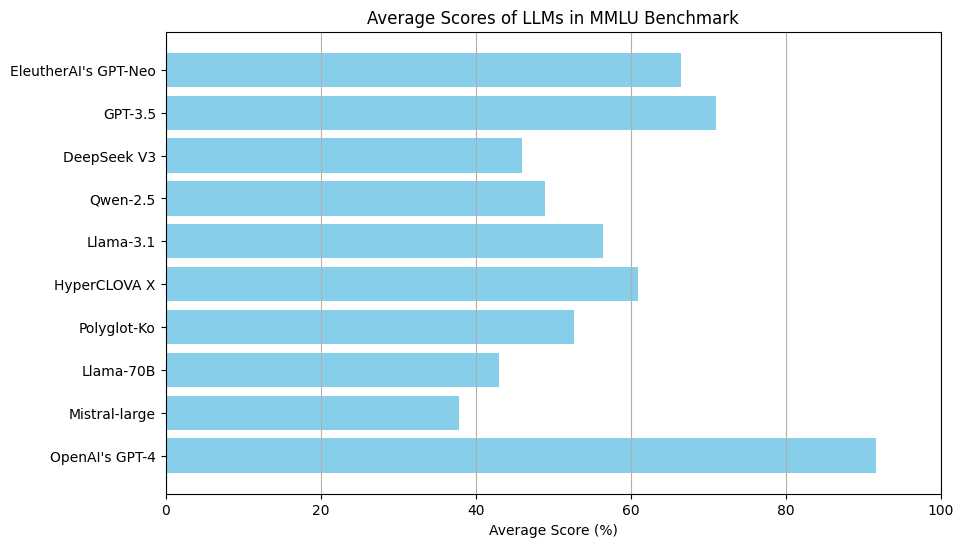

{'VizGenerator': {'messages': [HumanMessage(content="### Report on LLMs Performance in STEM and Humanities Sections of MMLU\n\n#### Introduction\nThis report summarizes the performance of various large language models (LLMs) on the Massive Multitask Language Understanding (MMLU) benchmark, specifically focusing on their scores in the STEM and Humanities sections. The MMLU benchmark is designed to evaluate the reasoning and understanding capabilities of LLMs across a wide range of subjects.\n\n#### Models Evaluated\nThe following ten LLMs were evaluated based on their performance in the MMLU benchmark:\n\n1. **OpenAI's GPT-4**\n2. **Mistral-large**\n3. **Llama-70B**\n4. **Polyglot-Ko**\n5. **HyperCLOVA X**\n6. **Llama-3.1**\n7. **Qwen-2.5**\n8. **DeepSeek V3**\n9. **GPT-3.5**\n10. **EleutherAI's GPT-Neo**\n\n#### Performance Summary\nThe scores of the models in the STEM and Humanities sections of the MMLU benchmark are as follows:\n\n| Model                | STEM Score (%) | Humanities 

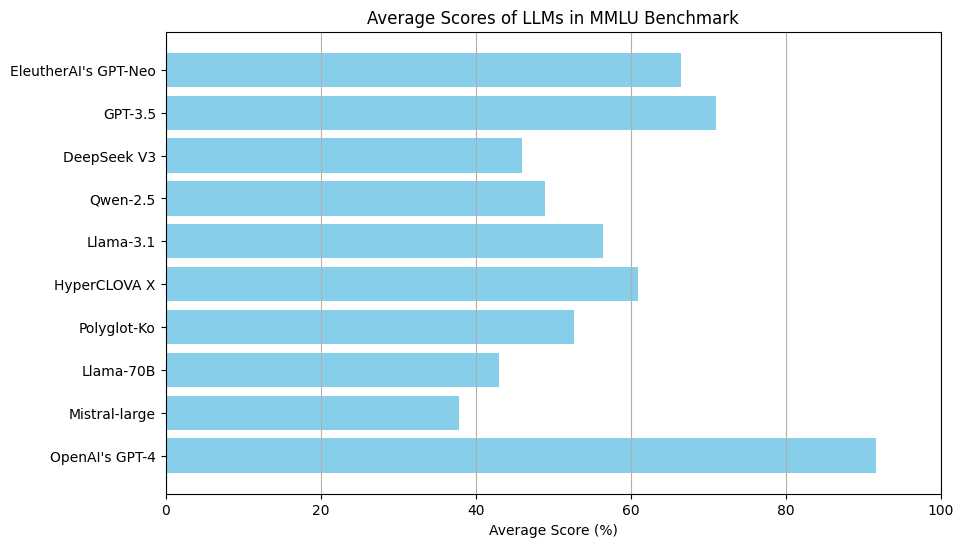

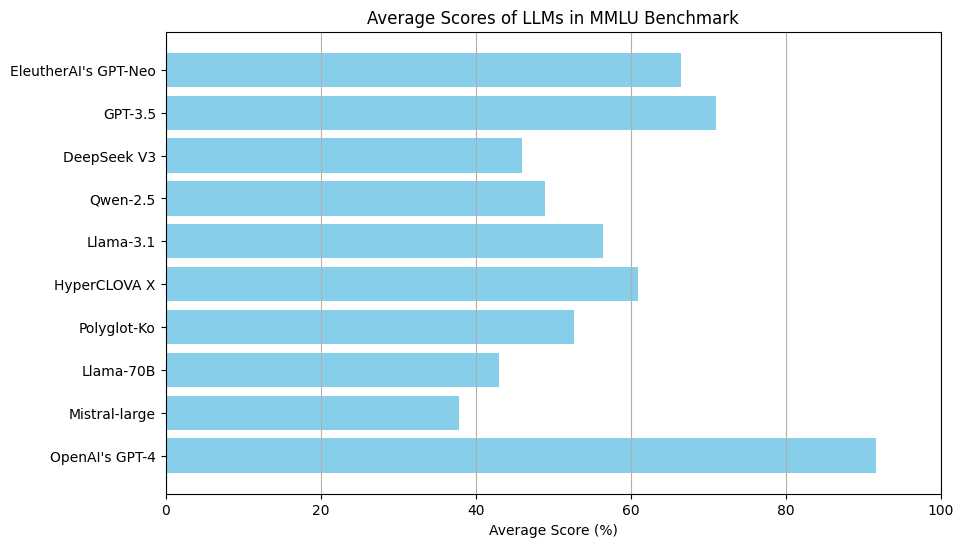

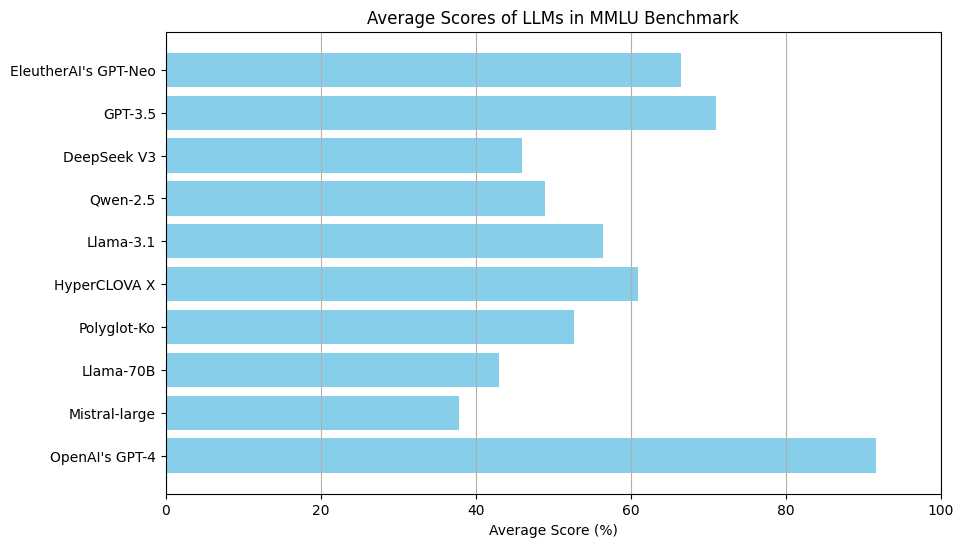

{'VizGenerator': {'messages': [HumanMessage(content="### Report on LLMs Performance in STEM and Humanities Sections of MMLU\n\n#### Introduction\nThis report summarizes the performance of various large language models (LLMs) on the Massive Multitask Language Understanding (MMLU) benchmark, specifically focusing on their scores in the STEM and Humanities sections. The MMLU benchmark is designed to evaluate the reasoning and understanding capabilities of LLMs across a wide range of subjects.\n\n#### Models Evaluated\nThe following ten LLMs were evaluated based on their performance in the MMLU benchmark:\n\n1. **OpenAI's GPT-4**\n2. **Mistral-large**\n3. **Llama-70B**\n4. **Polyglot-Ko**\n5. **HyperCLOVA X**\n6. **Llama-3.1**\n7. **Qwen-2.5**\n8. **DeepSeek V3**\n9. **GPT-3.5**\n10. **EleutherAI's GPT-Neo**\n\n#### Performance Summary\nThe scores of the models in the STEM and Humanities sections of the MMLU benchmark are as follows:\n\n| Model                | STEM Score (%) | Humanities 

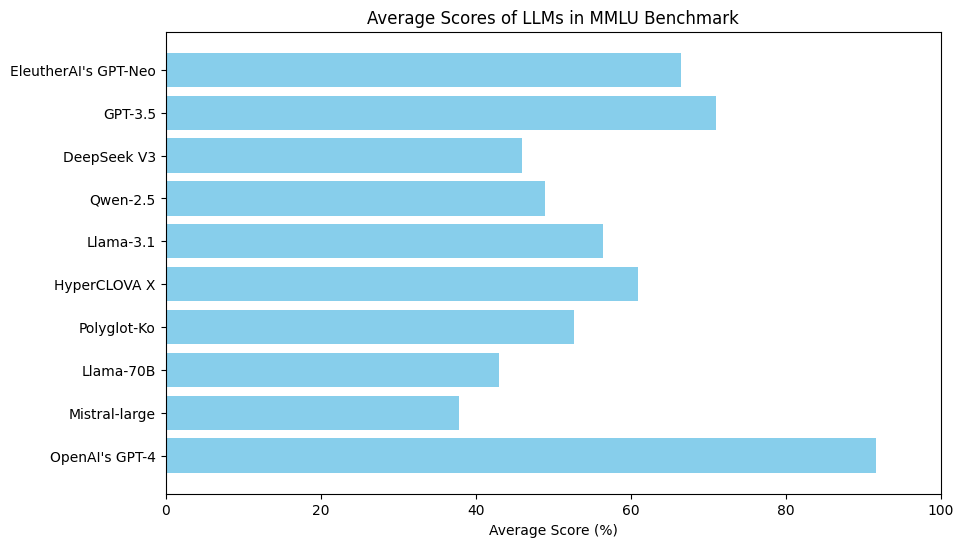

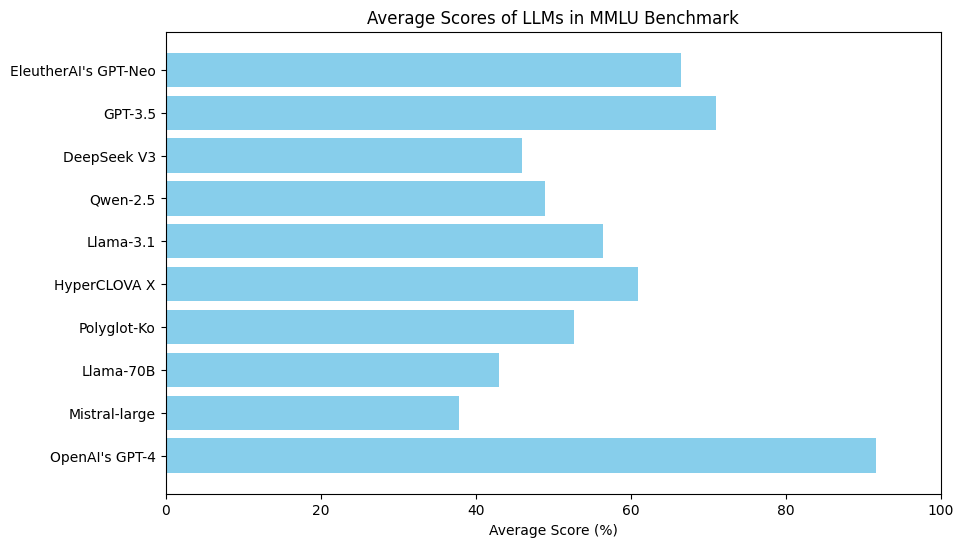

{'VizGenerator': {'messages': [HumanMessage(content="The report on the performance of various large language models (LLMs) in the STEM and Humanities sections of the MMLU benchmark has been successfully generated. Below are the downloadable links for the histogram and the performance summary:\n\n#### Download Links\n- [Histogram of Average Scores](sandbox:/mnt/data/average_scores_histogram.png)\n- [Performance Summary CSV](sandbox:/mnt/data/llm_performance_summary.csv)\n\n### Summary of Findings\n- **Top Performer**: OpenAI's GPT-4 achieved the highest average score of 91.65%, demonstrating strong capabilities in both STEM and Humanities sections.\n- **Lowest Performer**: Mistral-large scored the lowest with an average of 37.9%, indicating significant room for improvement in understanding and reasoning tasks.\n- **General Trends**: There is a noticeable gap between the top-performing models and the others, particularly in the STEM section, where scores range from 35.6% to 92.8%. The Hu

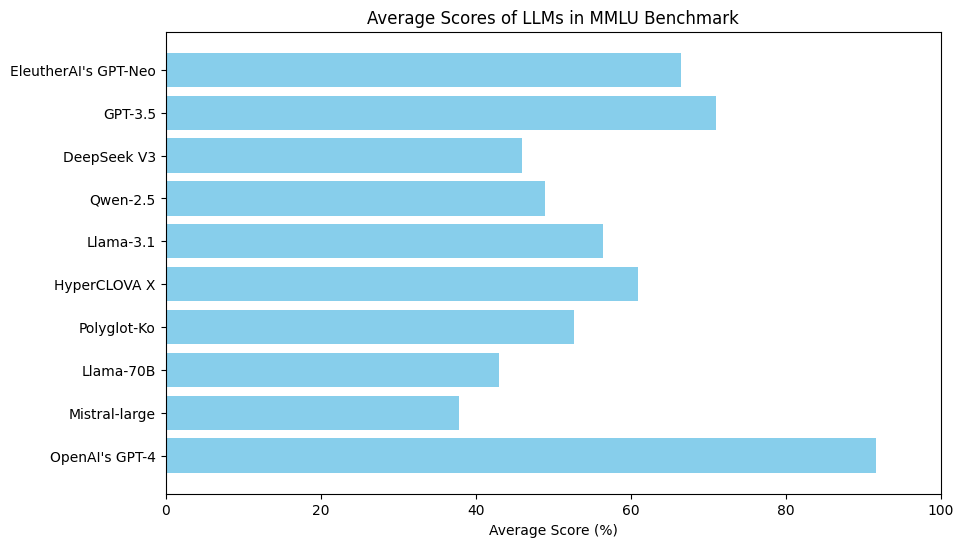

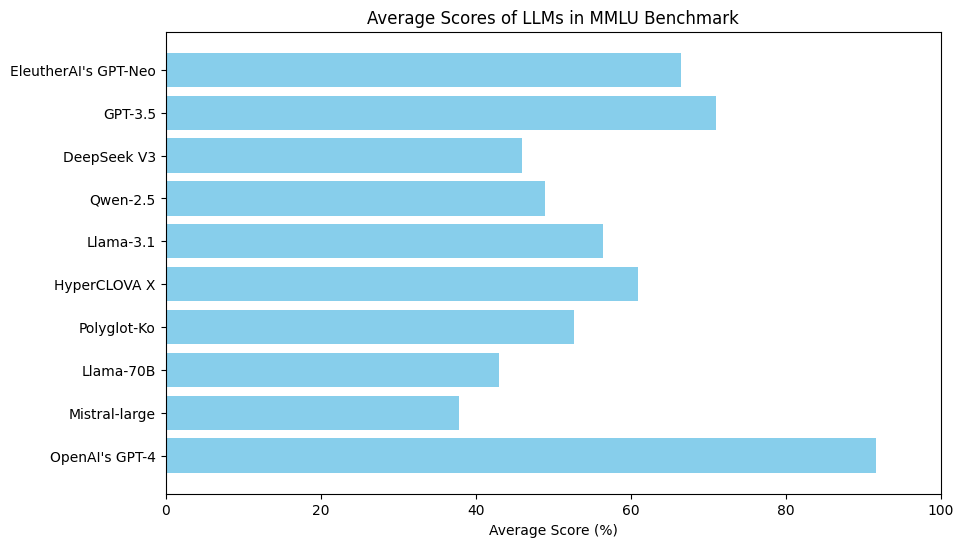

In [ ]:
for s in graph.stream(
    {"messages": [HumanMessage(content=query)]},
    {"recursion_limit": 100},
):
    if "__end__" not in s:
        print(s)
        print("----")

In [ ]:
a

In [ ]:
import json

from langchain_core.messages import (
    AIMessage,
    BaseMessage,
    ChatMessage,
    FunctionMessage,
    HumanMessage,
)

In [ ]:
from langchain.output_parsers.openai_functions import JsonOutputFunctionsParser
from langchain_core.messages import BaseMessage, HumanMessage
from langchain.agents import AgentExecutor, create_openai_tools_agent

# Agent wrapper
def create_agent(llm: ChatOpenAI, tools: list, system_message: str):
    prompt = ChatPromptTemplate.from_messages(
        [
            ("system", system_message,),
            MessagesPlaceholder(variable_name="messages"),
            MessagesPlaceholder(variable_name="agent_scratchpad"),
        ]
    )
    agent = create_openai_tools_agent(llm, tools, prompt)
    executor = AgentExecutor(agent=agent, tools=tools)
    return executor

In [ ]:
from typing import Annotated
from langchain_experimental.utilities import PythonREPL

repl = PythonREPL()
@tool
def python_repl(
    code: Annotated[str, "The python code to execute to generate your chart."]
):
    """Use this to execute python code. If you want to see the output of a value,
    you should print it out with `print(...)`. This is visible to the user."""
    try:
        result = repl.run(code)
    except BaseException as e:
        return f"Failed to execute. Error: {repr(e)}"
    return f"Succesfully executed:\n```python\n{code}\n```\nStdout: {result}"

In [ ]:
from langchain.tools import StructuredTool
from pydantic.v1 import BaseModel

def write_report(filename, html):
    with open(filename, 'w') as f:
        f.write(html)


class WriteReportArgsSchema(BaseModel):
    filename: str
    html: str


write_report_tool = StructuredTool.from_function(
    name="write_report",
    description="Write a HTML to disk. Use this tool whenever someone asks for a report.",
    func=write_report,
    args_schema=WriteReportArgsSchema
)

In [ ]:
def run_agent(state, agent, name):
    result = agent.invoke(state)
    return {"messages": [HumanMessage(content=result["output"], name=name)]}

In [ ]:
# Define the team members
members = ["Researcher", "VizGenerator", "ReportGenerator"]

# Define the options for the next action
options = ["FINISH"] + members

# Define the system prompt
system_prompt = (
    "You are a supervisor tasked with managing a conversation between the "
    "following workers: {members}. Given the following user request, "
    "respond with the worker to act next. Each worker will perform a "
    "task and respond with their results and status. When finished, "
    "respond with FINISH."
)

# Create the prompt template
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        MessagesPlaceholder(variable_name="messages"),
        (
            "system",
            "Given the conversation above, who should act next? "
            "Or should we FINISH? Select one of: {options}",
        ),
    ]
).partial(options=str(options), members=", ".join(members))

# Define the function for routing the next action
function_def = {
    "name": "route",
    "description": "Select the next role.",
    "parameters": {
        "title": "routeSchema",
        "type": "object",
        "properties": {
            "next": {
                "title": "Next",
                "anyOf": [{"enum": options}],
            }
        },
        "required": ["next"],
    },
}

# Initialize the LLM
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0, streaming=True)

In [ ]:
import operator
from typing import Annotated, Sequence, TypedDict
import functools

from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langgraph.graph import StateGraph, END

# Define the AgentState class to represent the state of each agent
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]
    next: str

# Create the research agent
research_agent = create_agent(
    llm,
    tools=load_tools(["arxiv"]) + [SemanticScholarQueryRun()],
    system_message="You should provide accurate data for the chart generator to use.",
)
research_node = functools.partial(run_agent, agent=research_agent, name="Researcher")

# Create the visualization generator agent
chart_agent = create_agent(
    llm,
    [python_repl],
    system_message="Any visualizations and tables you display will be visible by the user. Print the charts and tables once generated.",
)
chart_node = functools.partial(run_agent, agent=chart_agent, name="VizGenerator")

# Create the report generator agent
report_agent = create_agent(
    llm,
    [write_report_tool],
    system_message="Your job is to create an HTML report.",
)
report_node = functools.partial(run_agent, agent=report_agent, name="ReportGenerator")

# Create the supervisor chain using the ChatPromptTemplate and other configurations
supervisor_chain = (
    prompt
    | llm.bind_functions(functions=[function_def], function_call="route")
    | JsonOutputFunctionsParser()
)

# Define the workflow using the StateGraph
workflow = StateGraph(AgentState)
workflow.add_node("Researcher", research_node)
workflow.add_node("VizGenerator", chart_node)
workflow.add_node("ReportGenerator", report_node)
workflow.add_node("supervisor", supervisor_chain)

In [ ]:
# Ensure workers report back to the supervisor when done
for member in members:
    workflow.add_edge(member, "supervisor")

conditional_map = {member: member for member in members}
conditional_map["FINISH"] = END
workflow.add_conditional_edges("supervisor", lambda state: state["next"], conditional_map)
workflow.set_entry_point("supervisor")

# Compile the workflow graph
graph = workflow.compile()

In [ ]:
from IPython.display import Image, display
display(Image(graph.get_graph(xray=True).draw_png()))

In [ ]:
query = """List 10 llms with result on STEM and Humanities results on MMLU.
           Create a report that incluces the histogram of different models scores and an overall table.
           Include the summary of the findings in the report"""

In [ ]:
'''
for s in graph.stream(
    {"messages": [HumanMessage(content=query)]},
    {"recursion_limit": 100},
):
    if "__end__" not in s:
        print(s)
        print("----")
'''